In [246]:
# Libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [247]:
#load data from public url
url = "threegorges-water-storage.csv"
data_input = pd.read_csv(url, sep=',')


# create columns to link the previous day's data to current day's data
data_input['yesterday_upstream'] = data_input['upstream_water_level']
data_input['yesterday_inflow'] = data_input['inflow_rate']
data_input['yesterday_downstream'] = data_input['downstream_water_level']
data_input['yesterday_outflow'] = data_input['outflow_rate']

for i in range(3666):
    data_input['yesterday_downstream'][i+1] = data_input['downstream_water_level'][i]
    data_input['yesterday_inflow'][i+1] = data_input['inflow_rate'][i]
    data_input['yesterday_upstream'][i+1] = data_input['upstream_water_level'][i]
    data_input['yesterday_outflow'][i+1] = data_input['outflow_rate'][i]

data_input

/tmp/ipykernel_7719/4198976372.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_input['yesterday_downstream'][i+1] = data_input['downstream_water_level'][i]
/tmp/ipykernel_7719/4198976372.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_input['yesterday_inflow'][i+1] = data_input['inflow_rate'][i]
/tmp/ipykernel_7719/4198976372.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_input['yesterday_upstream'][i+1] 

measurement_date  upstream_water_level  downstream_water_level  \
0         2011 Apr 17                159.94                   64.82   
1         2011 Apr 18                159.62                   65.20   
2         2011 Apr 19                159.30                   64.85   
3         2011 Apr 20                158.94                   64.58   
4         2011 Apr 21                158.70                   65.14   
...               ...                   ...                     ...   
3662      2021 Apr 26                159.97                   43.21   
3663      2021 Apr 27                159.74                   42.85   
3664      2021 Apr 28                159.17                   43.22   
3665      2021 Apr 29                158.73                   43.41   
3666      2021 Apr 30                158.48                   43.86   

      inflow_rate  outflow_rate  yesterday_upstream  yesterday_inflow  \
0          6500.0        7490.0              159.94            6500.0   
1          6100.0        8070.0              159.94            6500.0   
2          5800.0        8100.0              159.62            6100.0   
3          5800.0        8080.0              159.30            5800.0   
4          6600.0        8140.0              158.94            5800.0   
...           ...           ...                 ...               ...   
3662      10500.0       14900.0              160.43           10000.0   
3663      10500.0       11600.0              159.97           10500.0   
3664       9800.0       15100.0              159.74           10500.0   
3665       9500.0       13300.0              159.17            9800.0   
3666       9000.0       11700.0              158.73            9500.0   

      yesterday_downstream  yesterday_outflow  
0                    64.82             7490.0  
1                    64.82             7490.0  
2                    65.20             8070.0  
3                    64.85             8100.0  
4                    64.58             8080.0  
...                    ...                ...  
3662                 43.16            13100.0  
3663                 43.21            14900.0  
3664                 42.85            11600.0  
3665                 43.22            15100.0  
3666                 43.41            13300.0  

[3667 rows x 9 columns]

In [248]:
data_input.dropna(inplace = True)
#data_input = data_input.dropna()
data_input

measurement_date  upstream_water_level  downstream_water_level  \
0         2011 Apr 17                159.94                   64.82   
1         2011 Apr 18                159.62                   65.20   
2         2011 Apr 19                159.30                   64.85   
3         2011 Apr 20                158.94                   64.58   
4         2011 Apr 21                158.70                   65.14   
...               ...                   ...                     ...   
3662      2021 Apr 26                159.97                   43.21   
3663      2021 Apr 27                159.74                   42.85   
3664      2021 Apr 28                159.17                   43.22   
3665      2021 Apr 29                158.73                   43.41   
3666      2021 Apr 30                158.48                   43.86   

      inflow_rate  outflow_rate  yesterday_upstream  yesterday_inflow  \
0          6500.0        7490.0              159.94            6500.0   
1          6100.0        8070.0              159.94            6500.0   
2          5800.0        8100.0              159.62            6100.0   
3          5800.0        8080.0              159.30            5800.0   
4          6600.0        8140.0              158.94            5800.0   
...           ...           ...                 ...               ...   
3662      10500.0       14900.0              160.43           10000.0   
3663      10500.0       11600.0              159.97           10500.0   
3664       9800.0       15100.0              159.74           10500.0   
3665       9500.0       13300.0              159.17            9800.0   
3666       9000.0       11700.0              158.73            9500.0   

      yesterday_downstream  yesterday_outflow  
0                    64.82             7490.0  
1                    64.82             7490.0  
2                    65.20             8070.0  
3                    64.85             8100.0  
4                    64.58             8080.0  
...                    ...                ...  
3662                 43.16            13100.0  
3663                 43.21            14900.0  
3664                 42.85            11600.0  
3665                 43.22            15100.0  
3666                 43.41            13300.0  

[3508 rows x 9 columns]

In [249]:
data_input.isna().sum()

measurement_date          0
upstream_water_level      0
downstream_water_level    0
inflow_rate               0
outflow_rate              0
yesterday_upstream        0
yesterday_inflow          0
yesterday_downstream      0
yesterday_outflow         0
dtype: int64

# Visualise the data

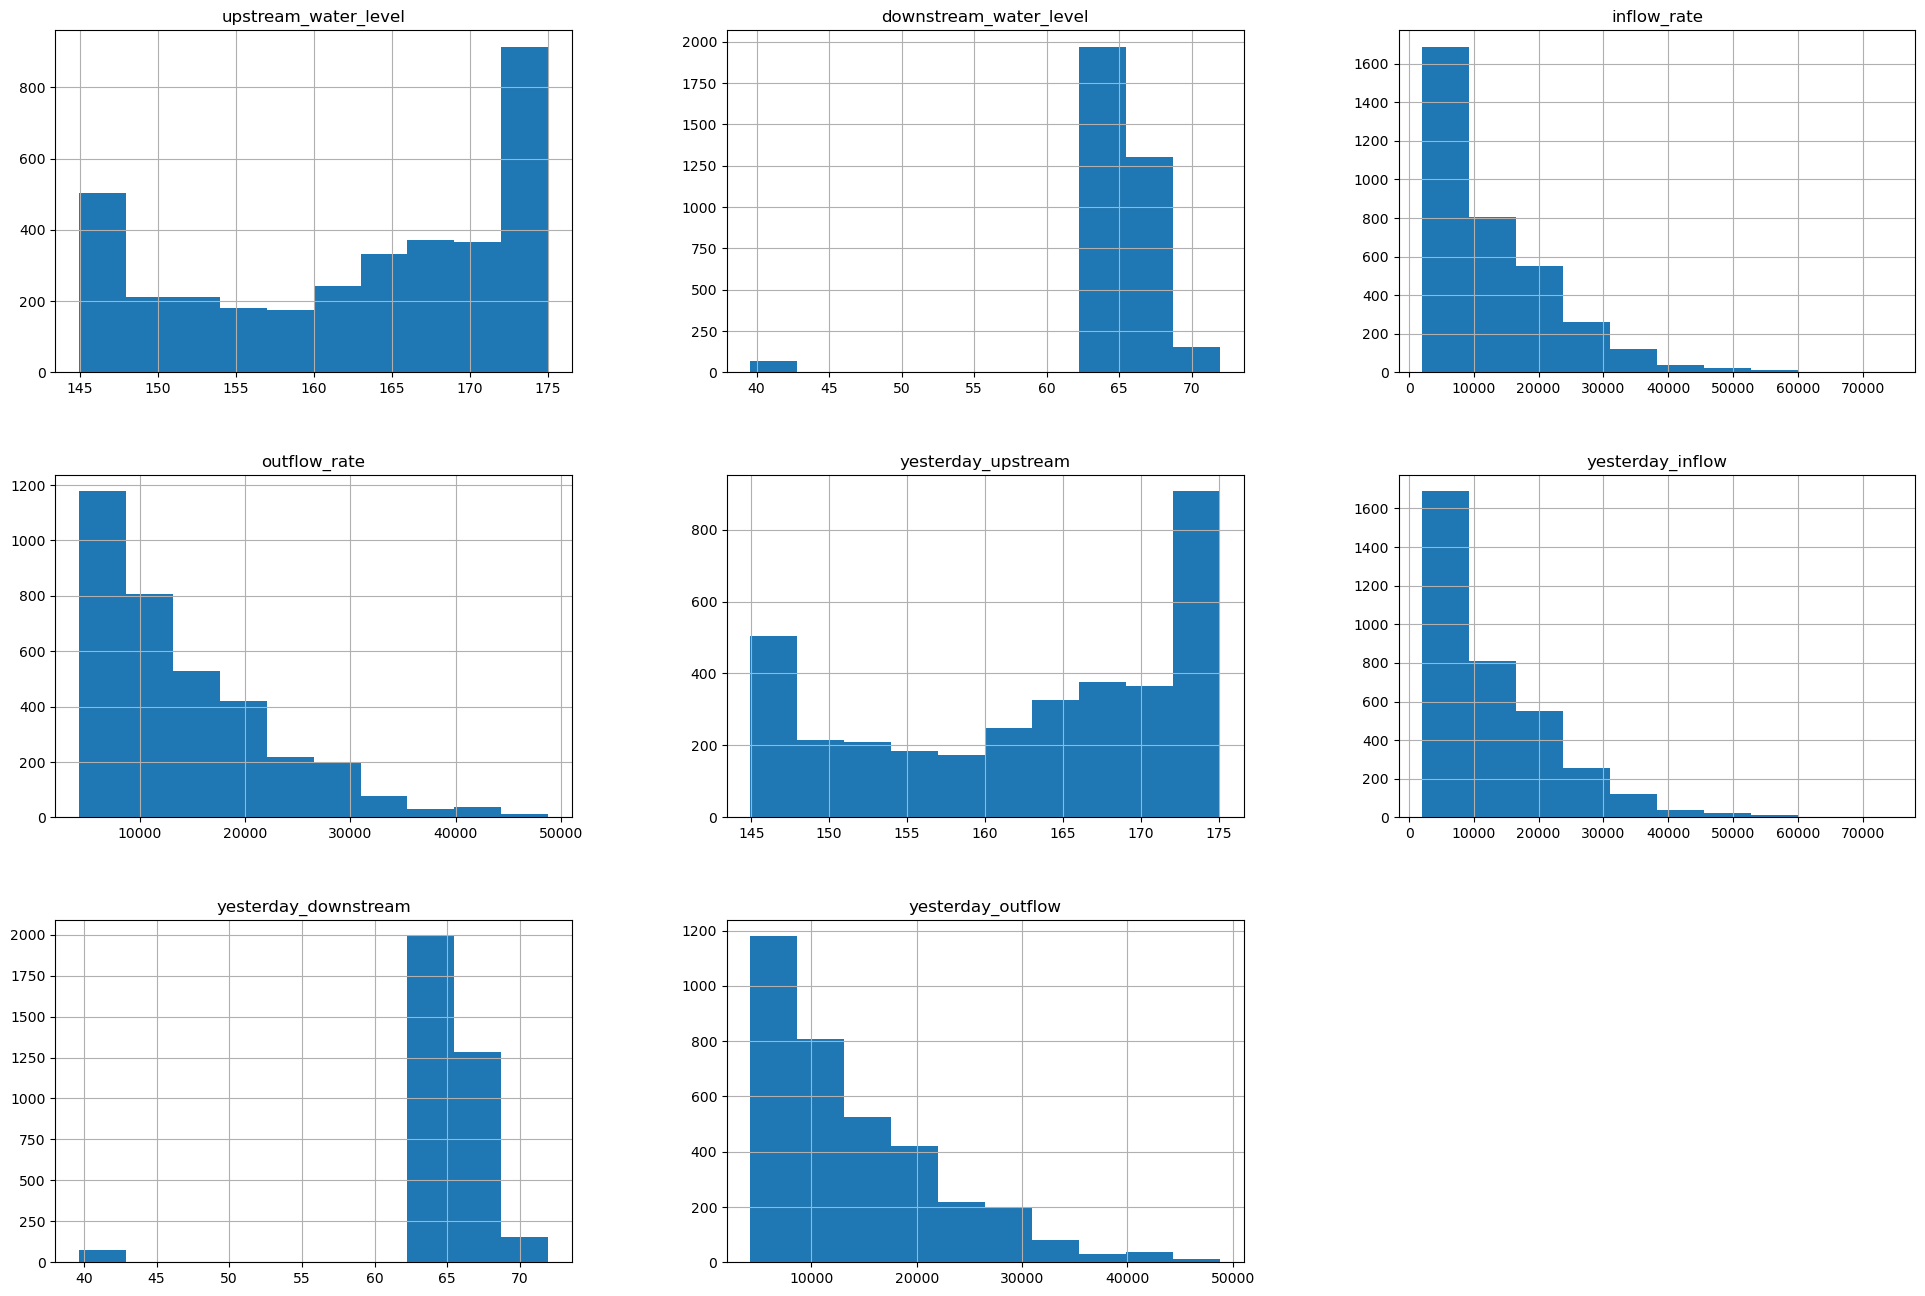

In [250]:
data_input.hist(figsize=(24, 16))
plt.show()

In [251]:
corr_matrix = data_input.corr(numeric_only=True)
corr_matrix

upstream_water_level  downstream_water_level  \
upstream_water_level                1.000000               -0.165931   
downstream_water_level             -0.165931                1.000000   
inflow_rate                        -0.491029                0.368217   
outflow_rate                       -0.561639                0.400968   
yesterday_upstream                  0.998186               -0.169235   
yesterday_inflow                   -0.470340                0.372186   
yesterday_downstream               -0.163756                0.990465   
yesterday_outflow                  -0.555693                0.396365   

                        inflow_rate  outflow_rate  yesterday_upstream  \
upstream_water_level      -0.491029     -0.561639            0.998186   
downstream_water_level     0.368217      0.400968           -0.169235   
inflow_rate                1.000000      0.902404           -0.512000   
outflow_rate               0.902404      1.000000           -0.566266   
yesterday_upstream        -0.512000     -0.566266            1.000000   
yesterday_inflow           0.952527      0.906400           -0.490980   
yesterday_downstream       0.359097      0.392548           -0.167482   
yesterday_outflow          0.884463      0.971805           -0.561040   

                        yesterday_inflow  yesterday_downstream  \
upstream_water_level           -0.470340             -0.163756   
downstream_water_level          0.372186              0.990465   
inflow_rate                     0.952527              0.359097   
outflow_rate                    0.906400              0.392548   
yesterday_upstream             -0.490980             -0.167482   
yesterday_inflow                1.000000              0.368141   
yesterday_downstream            0.368141              1.000000   
yesterday_outflow               0.902408              0.401868   

                        yesterday_outflow  
upstream_water_level            -0.555693  
downstream_water_level           0.396365  
inflow_rate                      0.884463  
outflow_rate                     0.971805  
yesterday_upstream              -0.561040  
yesterday_inflow                 0.902408  
yesterday_downstream             0.401868  
yesterday_outflow                1.000000

In [252]:
corr_matrix["outflow_rate"].sort_values(ascending=False)

outflow_rate              1.000000
yesterday_outflow         0.971805
yesterday_inflow          0.906400
inflow_rate               0.902404
downstream_water_level    0.400968
yesterday_downstream      0.392548
upstream_water_level     -0.561639
yesterday_upstream       -0.566266
Name: outflow_rate, dtype: float64

# Drop measurement_date as it is not part of our ML model

In [253]:
data_input=data_input.drop('measurement_date', axis=1)
data_input

upstream_water_level  downstream_water_level  inflow_rate  outflow_rate  \
0                   159.94                   64.82       6500.0        7490.0   
1                   159.62                   65.20       6100.0        8070.0   
2                   159.30                   64.85       5800.0        8100.0   
3                   158.94                   64.58       5800.0        8080.0   
4                   158.70                   65.14       6600.0        8140.0   
...                    ...                     ...          ...           ...   
3662                159.97                   43.21      10500.0       14900.0   
3663                159.74                   42.85      10500.0       11600.0   
3664                159.17                   43.22       9800.0       15100.0   
3665                158.73                   43.41       9500.0       13300.0   
3666                158.48                   43.86       9000.0       11700.0   

      yesterday_upstream  yesterday_inflow  yesterday_downstream  \
0                 159.94            6500.0                 64.82   
1                 159.94            6500.0                 64.82   
2                 159.62            6100.0                 65.20   
3                 159.30            5800.0                 64.85   
4                 158.94            5800.0                 64.58   
...                  ...               ...                   ...   
3662              160.43           10000.0                 43.16   
3663              159.97           10500.0                 43.21   
3664              159.74           10500.0                 42.85   
3665              159.17            9800.0                 43.22   
3666              158.73            9500.0                 43.41   

      yesterday_outflow  
0                7490.0  
1                7490.0  
2                8070.0  
3                8100.0  
4                8080.0  
...                 ...  
3662            13100.0  
3663            14900.0  
3664            11600.0  
3665            15100.0  
3666            13300.0  

[3508 rows x 8 columns]

# Encode and scale the columns

In [254]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [255]:
col_preprocessor = StandardScaler()
cols = data_input.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', col_preprocessor, cols)],  # apply StandardScaler to numerical columns
        remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['upstream_water_level',
                                  'downstream_water_level', 'inflow_rate',
                                  'outflow_rate', 'yesterday_upstream',
                                  'yesterday_inflow', 'yesterday_downstream',
                                  'yesterday_outflow'])])

In [256]:
#data_prepared = pd.DataFrame(preprocessor.fit_transform(data_input))
data_prepared = data_input

feature_names = list(data_input.columns.values)
#data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)

#data_prepared.rename(columns={'upstream_water_level', 'downstream_water_level', 'inflow_rate', 'outflow_rate', 'yesterday_upstream', 'yesterday_inflow', 'yesterday_downstream', 'yesterday_outflow'}, inplace=True);

data_prepared.columns = feature_names

data_prepared

upstream_water_level  downstream_water_level  inflow_rate  outflow_rate  \
0                   159.94                   64.82       6500.0        7490.0   
1                   159.62                   65.20       6100.0        8070.0   
2                   159.30                   64.85       5800.0        8100.0   
3                   158.94                   64.58       5800.0        8080.0   
4                   158.70                   65.14       6600.0        8140.0   
...                    ...                     ...          ...           ...   
3662                159.97                   43.21      10500.0       14900.0   
3663                159.74                   42.85      10500.0       11600.0   
3664                159.17                   43.22       9800.0       15100.0   
3665                158.73                   43.41       9500.0       13300.0   
3666                158.48                   43.86       9000.0       11700.0   

      yesterday_upstream  yesterday_inflow  yesterday_downstream  \
0                 159.94            6500.0                 64.82   
1                 159.94            6500.0                 64.82   
2                 159.62            6100.0                 65.20   
3                 159.30            5800.0                 64.85   
4                 158.94            5800.0                 64.58   
...                  ...               ...                   ...   
3662              160.43           10000.0                 43.16   
3663              159.97           10500.0                 43.21   
3664              159.74           10500.0                 42.85   
3665              159.17            9800.0                 43.22   
3666              158.73            9500.0                 43.41   

      yesterday_outflow  
0                7490.0  
1                7490.0  
2                8070.0  
3                8100.0  
4                8080.0  
...                 ...  
3662            13100.0  
3663            14900.0  
3664            11600.0  
3665            15100.0  
3666            13300.0  

[3508 rows x 8 columns]

<Axes: >

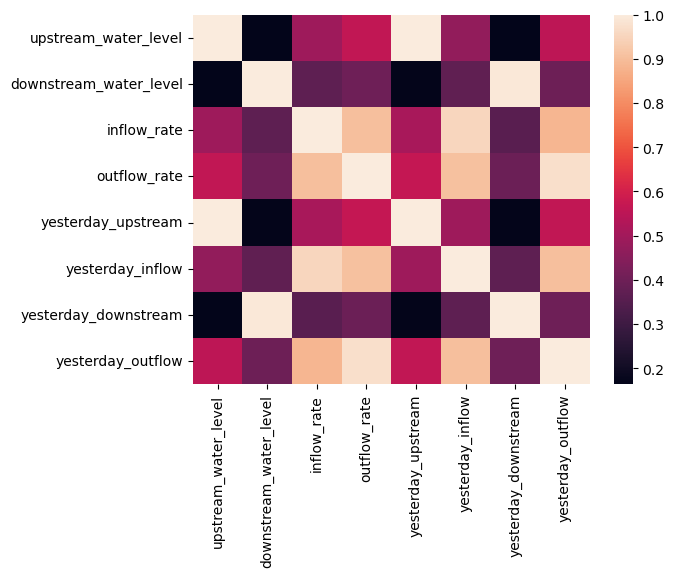

In [257]:
# display new correlations with a heatmap
corr = data_prepared.corr().abs()
sns.heatmap(corr)

In [258]:
# shuffle dataframe
data_prepared = data_prepared.sample(frac=1, random_state=42)
data_prepared

upstream_water_level  downstream_water_level  inflow_rate  outflow_rate  \
3300                157.86                   64.98       7500.0       12400.0   
358                 163.72                   64.81       5100.0        4900.0   
2277                155.62                   68.50      22500.0       29000.0   
3076                160.07                   67.47      24500.0       22900.0   
473                 159.98                   69.62      34000.0       33800.0   
...                    ...                     ...          ...           ...   
1169                145.83                   65.14      17500.0       18400.0   
1204                146.96                   65.28      27000.0       18200.0   
1368                170.67                   64.77       5900.0        6440.0   
934                 174.38                   65.11       7400.0        6350.0   
3321                151.97                   65.19       9500.0       13500.0   

      yesterday_upstream  yesterday_inflow  yesterday_downstream  \
3300              158.17            8200.0                 65.16   
358               163.74            5200.0                 65.06   
2277              156.50           23500.0                 68.52   
3076              158.85           33500.0                 67.62   
473               160.20           32500.0                 69.78   
...                  ...               ...                   ...   
1169              145.93           17800.0                 65.18   
1204              145.08           21000.0                 65.31   
1368              170.70            5900.0                 65.98   
934               174.26            7400.0                 64.94   
3321              152.31            8600.0                 65.27   

      yesterday_outflow  
3300            12400.0  
358              5810.0  
2277            28500.0  
3076            32300.0  
473             34200.0  
...                 ...  
1169            18400.0  
1204            18500.0  
1368             6450.0  
934              7010.0  
3321            12000.0  

[3508 rows x 8 columns]

In [259]:
# Split the dataset into a training dataset (80%) and testing dataset.

from sklearn.model_selection import train_test_split

# dataframe containing all features except for target, aka. feature matrix
X = data_prepared.drop(["outflow_rate"], axis=1)

# target variable vector
y = data_prepared["outflow_rate"]

#split the data into train and test set based on the above arguments, with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2806, 7) (2806,) (702, 7) (702,)


# Polynomial regression with degree 2

In [260]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)

X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [261]:
#train and test the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2s

pr_model = LinearRegression()

# train the model with the polynomial data
pr_model.fit(X_train_poly, y_train)

# predict with the trained model
pr_y_pred = pr_model.predict(X_test_poly)

#calculate metrics by comparing predicted target vector with actual target vector
print (mse(y_test, pr_y_pred))

4261257.991183014


# Export to pkl file

In [262]:
import joblib
joblib.dump(pr_model, 'outflowmodel.pkl')

['outflowmodel.pkl']